In [94]:
#decisionTreeclassifier kullanarak sınıflandırmak algoritmasını 
#kullanacağız 

#veri setimiz starbuck ürünlerinin içerikleirni içeiriyor
#BU PROJEYİ BİR DERS NİTELİĞİNDE DÜŞÜN BİR ŞEYLER KAPMAYA ÇALIŞ !!!

In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [96]:
df = pd.read_csv("starbucks.csv",index_col=0)#indexi düzgün başlamadığı için 0. indexi göz ardı edicez


In [97]:
df.head()
# Note we have 7 columns in the dataset
# The item column contains the names of the items in the menu
# calories : stands for calories
# fat : refers to the amount of fat
# carb : carbohydrate
# fiber : refers to the amount of fiber in the product
# protein : expresses the amount of protein
# type : indicates which category the product belongs to

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [99]:
df.describe().T
# count : here shows the number of data
# mean : show their average
# std : tells standard deviations
# min : this value shows the minimum values

,count,mean,std,min,25%,50%,75%,max
calories,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
fat,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
carb,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
fiber,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [100]:
df["item"].nunique()
#77 farklı ürün çeşidi olduğu görüyüoruz

77

In [101]:
df["item"].unique()
#şimdi ise bu 77 farklı yenebilecek değerlerin isimlerini geri aldık 

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [102]:
df["type"].unique()
#type'daki benzersiz ürünleri gördük şu anda da 

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [103]:
#şimdi de her bir kategoriye ait ürünlerin sayısını elde etmeye çalışalım 
df.groupby("type")["item"].count()
#type'daki ürünleri yani item'leri gördük bözylece 
#2 farklı sütunu kullanarak sonuçlara ulaştık 

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

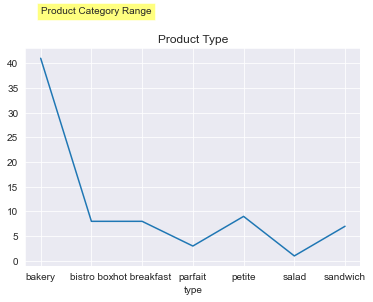

In [104]:
df.groupby("type")["item"].count().plot()
plt.title("Product Type")
plt.text(0.,50,"Product Category Range",bbox=dict(facecolor="yellow",alpha=0.5))
plt.show()

#facecolor="yellow" yazının arkasını sarı renge çevirdi dikkat et alphasını 0.5 olacak şekilde ayarladık 
#categorik ve numeric verileri beraber kullanabildik böylece 

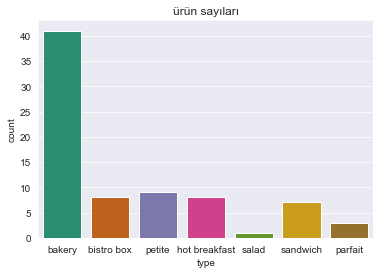

In [105]:
#bir de sütun grafiğinde görelim 
sns.countplot(x="type",data=df,palette="Dark2")
#X="type" diyerek type sütununa göre işlem yapmasını söyledik
plt.title("ürün sayıları")
plt.show()
#yine categoric ve numeric verileri beraber inceledik 

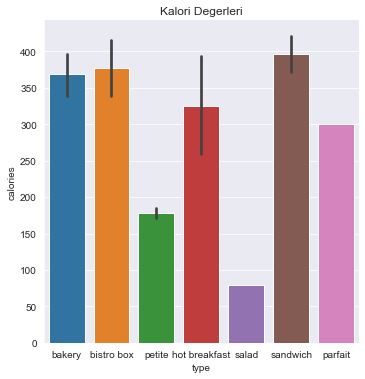

In [106]:
#type sütununa göre içerdiği kalori miktarlrını hesaplayalım şimdi de 
sns.catplot(kind="bar",x="type",y="calories",data=df)
plt.title("Kalori Degerleri")
plt.show()
#salataların kalorisinin oldukça düşük olduğunu görüyoruz!!! 
#veri görselleştirerek verileri incelyioruz buralarda veriler hakkında çıkarımsal bilgiler ediniyoruz!!!

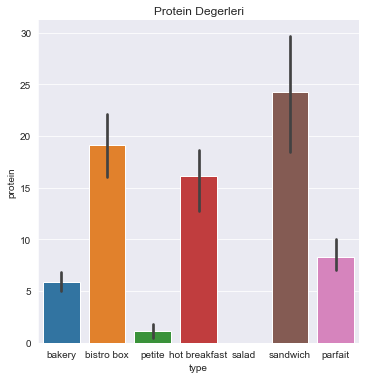

In [107]:
#şimdi de protein değerlerine bakalım 
sns.catplot(kind="bar",x="type",y="protein",data=df)
plt.title("Protein Degerleri")
plt.show()

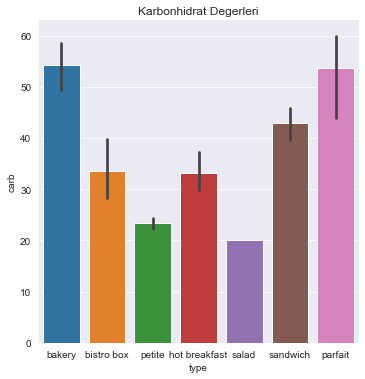

In [108]:
sns.catplot(kind="bar",x="type",y="carb",data=df)
plt.title("Karbonhidrat Degerleri")
plt.show()

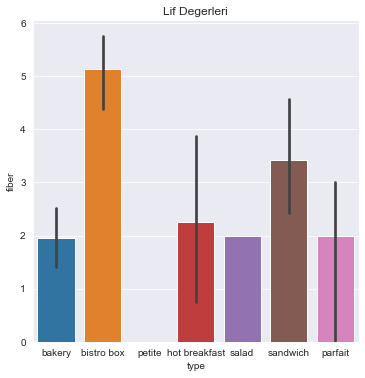

In [109]:
sns.catplot(kind="bar",x="type",y="fiber",data=df)
plt.title("Lif Degerleri")
plt.show()

In [110]:
#sayısal sütunların correlation değerlerine bakalım 
df.corr()
# correlasyon pozitif olunca örneğin yağ oranı arttıkça kalori oranınında arttığını görmüş olduk 
# yani pozitif ve yüksek bir kolerasyon güçlü bir doğru orantı yaratır
# mesela kalori ve lif ilişkisindeki kolerasyona bakınca düşük bir korelasyon var yani düşük bir bağlantı görülüyor!!!
# yağ ve lif ilişkisi arasında dikkat et ters bir orantı bulunuyor !!!


,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


<AxesSubplot:>

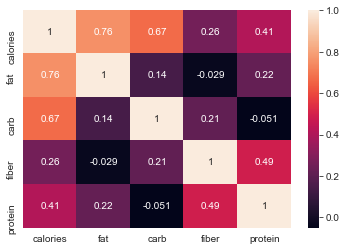

In [111]:
#şimdi ise bunu sıcaklık haritasıyla gösterielim 
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'Kalori ve Yağ oranı '}, xlabel='calories', ylabel='fat'>

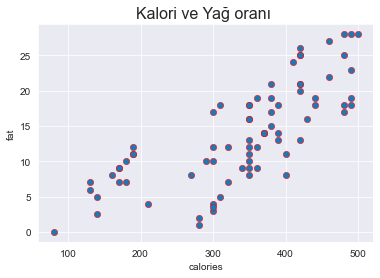

In [112]:
#kalori ve yağ arasındaki ilişkiye bakalım ve saçılım grafiğinde görelim 
plt.title("Kalori ve Yağ oranı ",fontsize=16)
sns.scatterplot(x="calories",y="fat",data=df,s=40,edgecolor="red")

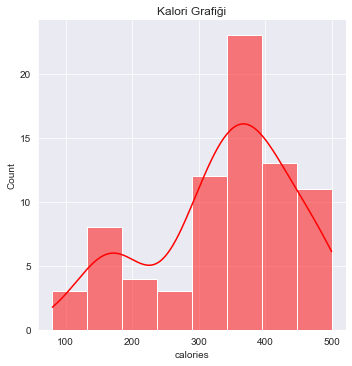

In [113]:
#şimdi de yiyecek ve içeceklerin kalori dağılımını görmek isteyelim
sns.displot(x="calories",data=df,color="red",kde=True) #kde=True sayesinde çizgiyi oluşturduk 
plt.title("Kalori Grafiği")
plt.show()
#kalorileirin ağırlıklı olarak bölgesi grafikte ki gibidir !!! 350-400 arasına sıkıştırılmış 
#yaklaşık olarak 25-26 çeşit türün en yüksek kaloriye sahip olduğunu görebiliyoruz

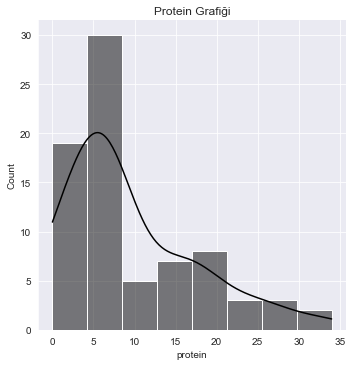

In [114]:
sns.displot(x="protein",data=df,color="black",kde=True)
plt.title("Protein Grafiği")
plt.show()
#dikkat edersek yüksek proteinli ürün çeşitleri gitgide azalıyor!!!

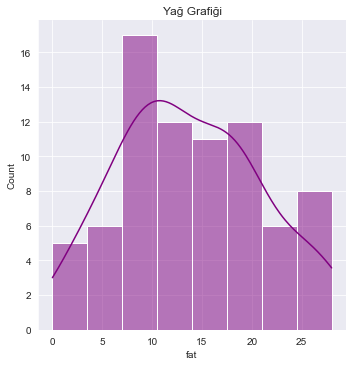

In [115]:
sns.displot(x="fat",data=df,color="purple",kde=True)
plt.title("Yağ Grafiği")
plt.show()

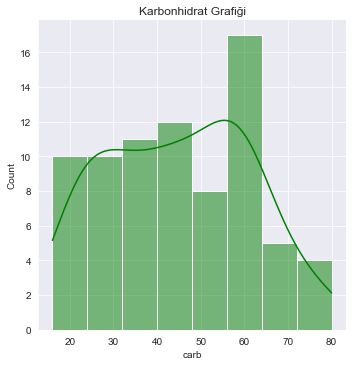

In [116]:
sns.displot(x="carb",data=df,color="green",kde=True)
plt.title("Karbonhidrat Grafiği")
plt.show()

In [117]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [118]:
#şimdi biz burada DecisionTreeClassifier() kullanarak ürünün hangi type'a ait olduğunu bulacağız 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score #hata değerlerini ayıklayacağız

In [119]:
y=df.type

In [120]:
y

1       bakery
2       bakery
3       bakery
4       bakery
5       bakery
        ...   
73    sandwich
74    sandwich
75     parfait
76     parfait
77     parfait
Name: type, Length: 77, dtype: object

In [121]:
X=df.drop('type',axis=1)
X=X.drop("item",axis=1)

In [122]:
X

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [125]:
y_pred=model.predict(X_test)

In [126]:
accuracy=accuracy_score(y_test,y_pred) #doğruluğu kontrol ediyoruz

In [127]:
print("Truth : ",accuracy)

Truth :  0.6875


In [128]:
prediction = model.predict([[250,2,40,7,9]])

C:\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [129]:
print("Tahmin : ",prediction)

Tahmin :  ['bakery']


In [130]:
print(prediction )

['bakery']


In [131]:
#şimdi ağaçlandırmasını görelim DecisionTreeClassifier()'ın

from sklearn.tree import plot_tree

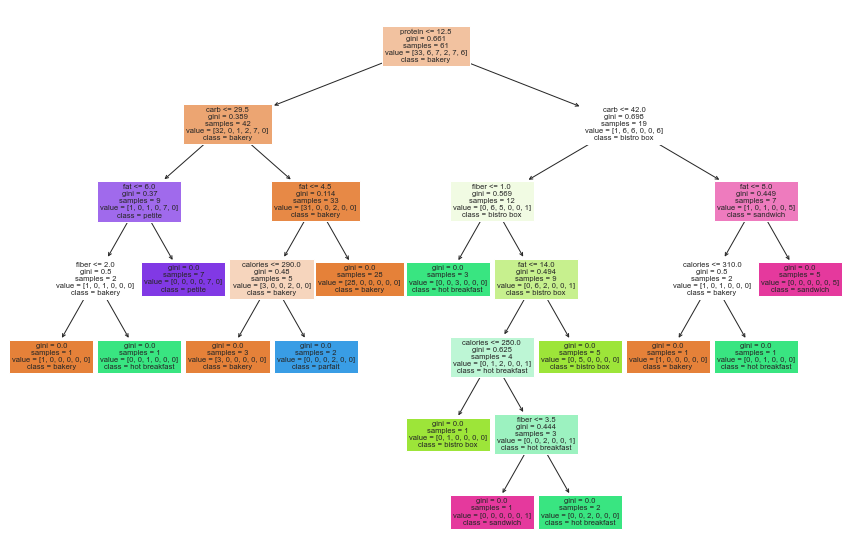

In [132]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=X.columns,class_names=model.classes_,filled=True)
plt.show()